In [48]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [49]:
!pip install polars

In [50]:
import polars as pl

In [51]:
df_rice = pl.read_csv('/content/drive/MyDrive/Crop yield dataset Bangladesh/rice_updated10k.csv')

In [52]:
df_rice.head(6)

Crop,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
str,str,str,f64,i64,f64,f64,f64,f64
"""Rice""","""Autumn""","""Dhaka""",607358.0,398311,2051.4,5.7802e7,188280.98,0.78087
"""Rice""","""Summer""","""Dhaka""",174974.0,209623,2051.4,1.6652e7,54241.94,1.060435
"""Rice""","""Winter""","""Dhaka""",1.743321e6,1647296,2051.4,1.6591e8,540429.51,0.941304
"""Rice""","""Monsoon""","""Chittagong""",1.03153e6,2340493,1266.7,9.8171e7,319774.3,2.2335
"""Rice""","""Winter""","""Chittagong""",53889.0,109350,1266.7,5.1286e6,16705.59,2.073846
"""Rice""","""Summer""","""Chittagong""",268044.0,762759,1266.7,2.5510e7,83093.64,2.829444


#What are the average, minimum, and maximum crop yields in different regions of Bangladesh?


In [53]:
yield_stats = df_rice.group_by("State").agg(
[pl.col("Yield").mean().alias("average_yield"), pl.col("Yield").min().alias("min_yield"), pl.col("Yield").max().alias("max_yield"),])

In [54]:
yield_stats

State,average_yield,min_yield,max_yield
str,f64,f64,f64
"""Tangail""",2.018331,0.8903125,8.778276
"""Gazipur""",1.735485,0.077333,3.530964
"""Bogra""",1.380338,0.574588,2.762088
"""Dhaka""",1.707097,0.655809,2.981114
"""Cox's Bazar""",3.287338,2.672333,3.801488
…,…,…,…
"""Dinajpur""",2.284284,0.80994,4.635593
"""Brahmanbaria""",1.533404,1.028581,1.750909
"""Rangpur""",2.339187,1.876667,2.68254


#How does crop yield vary across different districts or regions?

In [55]:
yield_variation = df_rice.group_by("State").agg(
[pl.col("Yield").mean().alias("average_yield"), pl.col("Yield").std().alias("yield_std_dev"),  # Standard deviation
pl.col("Yield").min().alias("min_yield"),
pl.col("Yield").max().alias("max_yield"),
pl.count().alias("num_records")]
).sort("average_yield", descending=True)

yield_variation

<ipython-input-55-e175fb3097b1>:5: DeprecationWarning: `pl.count()` is deprecated. Please use `pl.len()` instead.
  pl.count().alias("num_records")]


State,average_yield,yield_std_dev,min_yield,max_yield,num_records
str,f64,f64,f64,f64,u32
"""Narsingdi""",3.873877,0.299068,3.099412,4.366069,167
"""Narayanganj""",3.477518,0.699728,2.307503,4.730323,256
"""Cox's Bazar""",3.287338,0.289453,2.672333,3.801488,113
"""Jessore""",3.211639,0.6374,1.991739,4.747887,406
"""Faridpur""",2.969867,0.339813,2.235,3.431545,131
…,…,…,…,…,…
"""Brahmanbaria""",1.533404,0.159284,1.028581,1.750909,198
"""Sirajganj""",1.434073,0.339699,0.628503,2.169793,173
"""Bogra""",1.380338,0.590106,0.574588,2.762088,165


#What is the distribution of rainfallin the dataset?

In [56]:
rainfall_stats = df_rice.select("Annual_Rainfall").describe()

In [57]:
rainfall_stats

statistic,Annual_Rainfall
str,f64
"""count""",10000.0
"""null_count""",0.0
"""mean""",1218.394194
"""std""",991.990776
"""min""",-1182.0
"""25%""",551.7
"""50%""",994.7
"""75%""",1652.8
"""max""",6552.7


#Which region produces the highest yield for specific crops?

In [58]:
highest_yield_regions = df_rice.group_by(["State", "Crop"]).agg(pl.col("Yield").max().alias("max_yield")).sort("max_yield", descending=True)
highest_yield_regions

State,Crop,max_yield
str,str,f64
"""Tangail""","""Rice""",8.778276
"""Feni""","""Rice""",5.3425
"""Natore""","""Rice""",4.753762
"""Jessore""","""Rice""",4.747887
"""Narayanganj""","""Rice""",4.730323
…,…,…
"""Tongi""","""Rice""",2.663333
"""Rangamati""","""Rice""",2.426165
"""Sirajganj""","""Rice""",2.169793


# Which factors have the strongest correlation with Yield

In [59]:
# Calculate the correlation matrix
correlation_matrix = df_rice.select(pl.col("Yield"),pl.col("Fertilizer"),pl.col("Pesticide"),pl.col("Annual_Rainfall")).corr()
correlation_matrix

Yield,Fertilizer,Pesticide,Annual_Rainfall
f64,f64,f64,f64
1.0,-0.001169,-0.007119,-0.035923
-0.001169,1.0,0.951719,-0.277467
-0.007119,0.951719,1.0,-0.265232
-0.035923,-0.277467,-0.265232,1.0


#How does Yield vary with Annual_Rainfall and Fertilizer usage?

In [60]:
correlation_yield_rainfall = df_rice.select(pl.col("Yield"), pl.col("Annual_Rainfall")).corr()

correlation_yield_rainfall

Yield,Annual_Rainfall
f64,f64
1.0,-0.035923
-0.035923,1.0


In [61]:
correlation_yield_fertilizer = df_rice.select(pl.col("Yield"), pl.col("Fertilizer")).corr()
correlation_yield_fertilizer

Yield,Fertilizer
f64,f64
1.0,-0.001169
-0.001169,1.0


In [62]:
import matplotlib.pyplot as plt

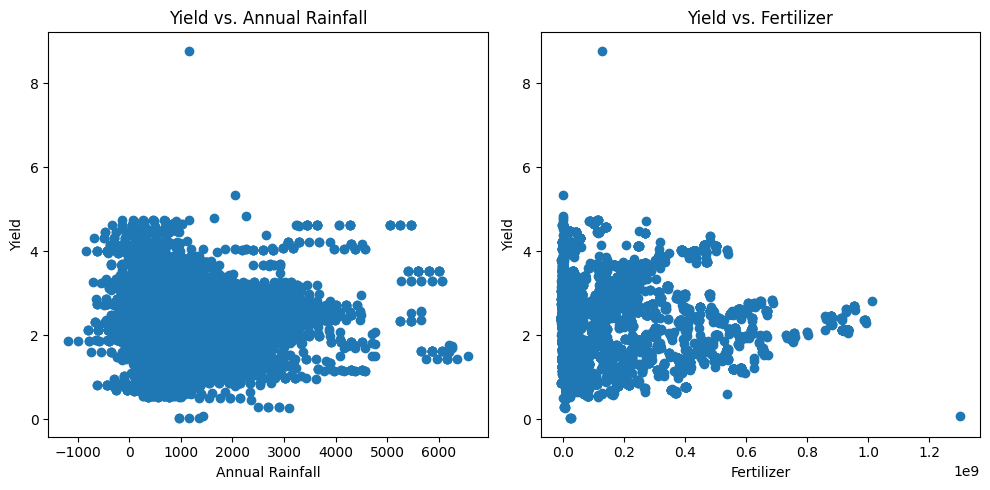

In [63]:
plt.figure(figsize=(10, 5))

# Scatter plot for Yield vs. Annual Rainfall
plt.subplot(1, 2, 1)
plt.scatter(df_rice["Annual_Rainfall"], df_rice["Yield"])
plt.xlabel("Annual Rainfall")
plt.ylabel("Yield")
plt.title("Yield vs. Annual Rainfall")


# Scatter plot for Yield vs. Fertilizer
plt.subplot(1, 2, 2)
plt.scatter(df_rice["Fertilizer"], df_rice["Yield"])
plt.xlabel("Fertilizer")
plt.ylabel("Yield")
plt.title("Yield vs. Fertilizer")

plt.tight_layout()
plt.show()